In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/edsa-movie-recommendation-predict/sample_submission.csv
/kaggle/input/edsa-movie-recommendation-predict/movies.csv
/kaggle/input/edsa-movie-recommendation-predict/imdb_data.csv
/kaggle/input/edsa-movie-recommendation-predict/genome_tags.csv
/kaggle/input/edsa-movie-recommendation-predict/genome_scores.csv
/kaggle/input/edsa-movie-recommendation-predict/train.csv
/kaggle/input/edsa-movie-recommendation-predict/test.csv
/kaggle/input/edsa-movie-recommendation-predict/tags.csv
/kaggle/input/edsa-movie-recommendation-predict/links.csv


**2. Loading the Data**

In [2]:
# load the data
df_train = pd.read_csv('/kaggle/input/edsa-movie-recommendation-predict/train.csv')
df_test = pd.read_csv('/kaggle/input/edsa-movie-recommendation-predict/test.csv')


**3. Exploratory Data Analysis (EDA)** 

In [3]:
#Exploring the dataset
df_train.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [4]:
df_test.head()

,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318


In [5]:
df_train.shape

(10000038, 4)

In [6]:
df_test.shape

(5000019, 2)

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 305.2 MB


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000019 entries, 0 to 5000018
Data columns (total 2 columns):
 #   Column   Dtype
---  ------   -----
 0   userId   int64
 1   movieId  int64
dtypes: int64(2)
memory usage: 76.3 MB


**Missing Values**

In [9]:
#Sum of missing values in the train Dataset
df_train.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Hurray! There is no missing value in our data.

We can explore futher our data using using the univariate and multivariate approach.

In [10]:
#Sum of missing values in the train Dataset
df_test.isnull().sum()

userId     0
movieId    0
dtype: int64

# 

**Univariate Analysis (Non-graphical)**

In [11]:
# look at descriptive data statistics
df_train.describe()

,userId,movieId,rating,timestamp
count,1.000004e+07,1.000004e+07,1.000004e+07,1.000004e+07
mean,8.119909e+04,2.138911e+04,3.533395e+00,1.215677e+09
std,4.679359e+04,3.919578e+04,1.061124e+00,2.268921e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,4.051000e+04,1.197000e+03,3.000000e+00,1.011742e+09
50%,8.091400e+04,2.947000e+03,3.500000e+00,1.199019e+09
75%,1.215790e+05,8.630000e+03,4.000000e+00,1.447242e+09
max,1.625410e+05,2.091710e+05,5.000000e+00,1.574328e+09


**Checking for Outliers**

In [12]:
#checking for outliers
df_train.kurtosis()

userId      -1.197634
movieId      4.351014
rating       0.221102
timestamp   -1.316891
dtype: float64

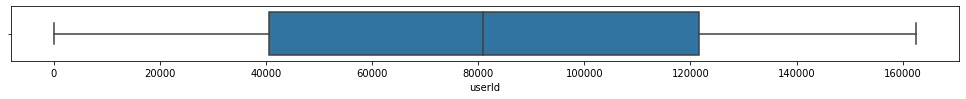

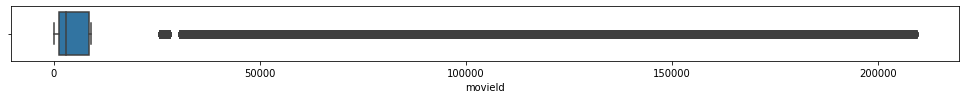

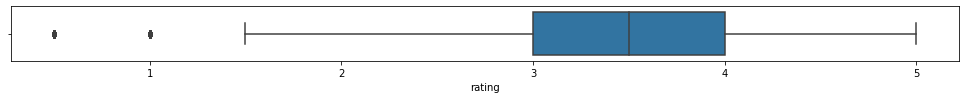

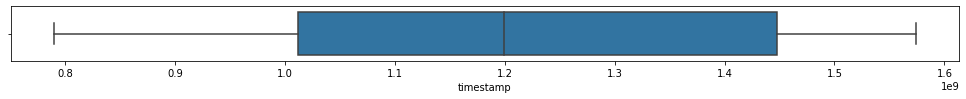

In [13]:
plt.rcParams.update({'figure.max_open_warning': 0})
for column in df_train:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df_train, x=column)

**Checking for Skewness**

In [14]:
#checking for skewness
df_train.skew()

userId       0.007477
movieId      2.200436
rating      -0.703118
timestamp   -0.017331
dtype: float64

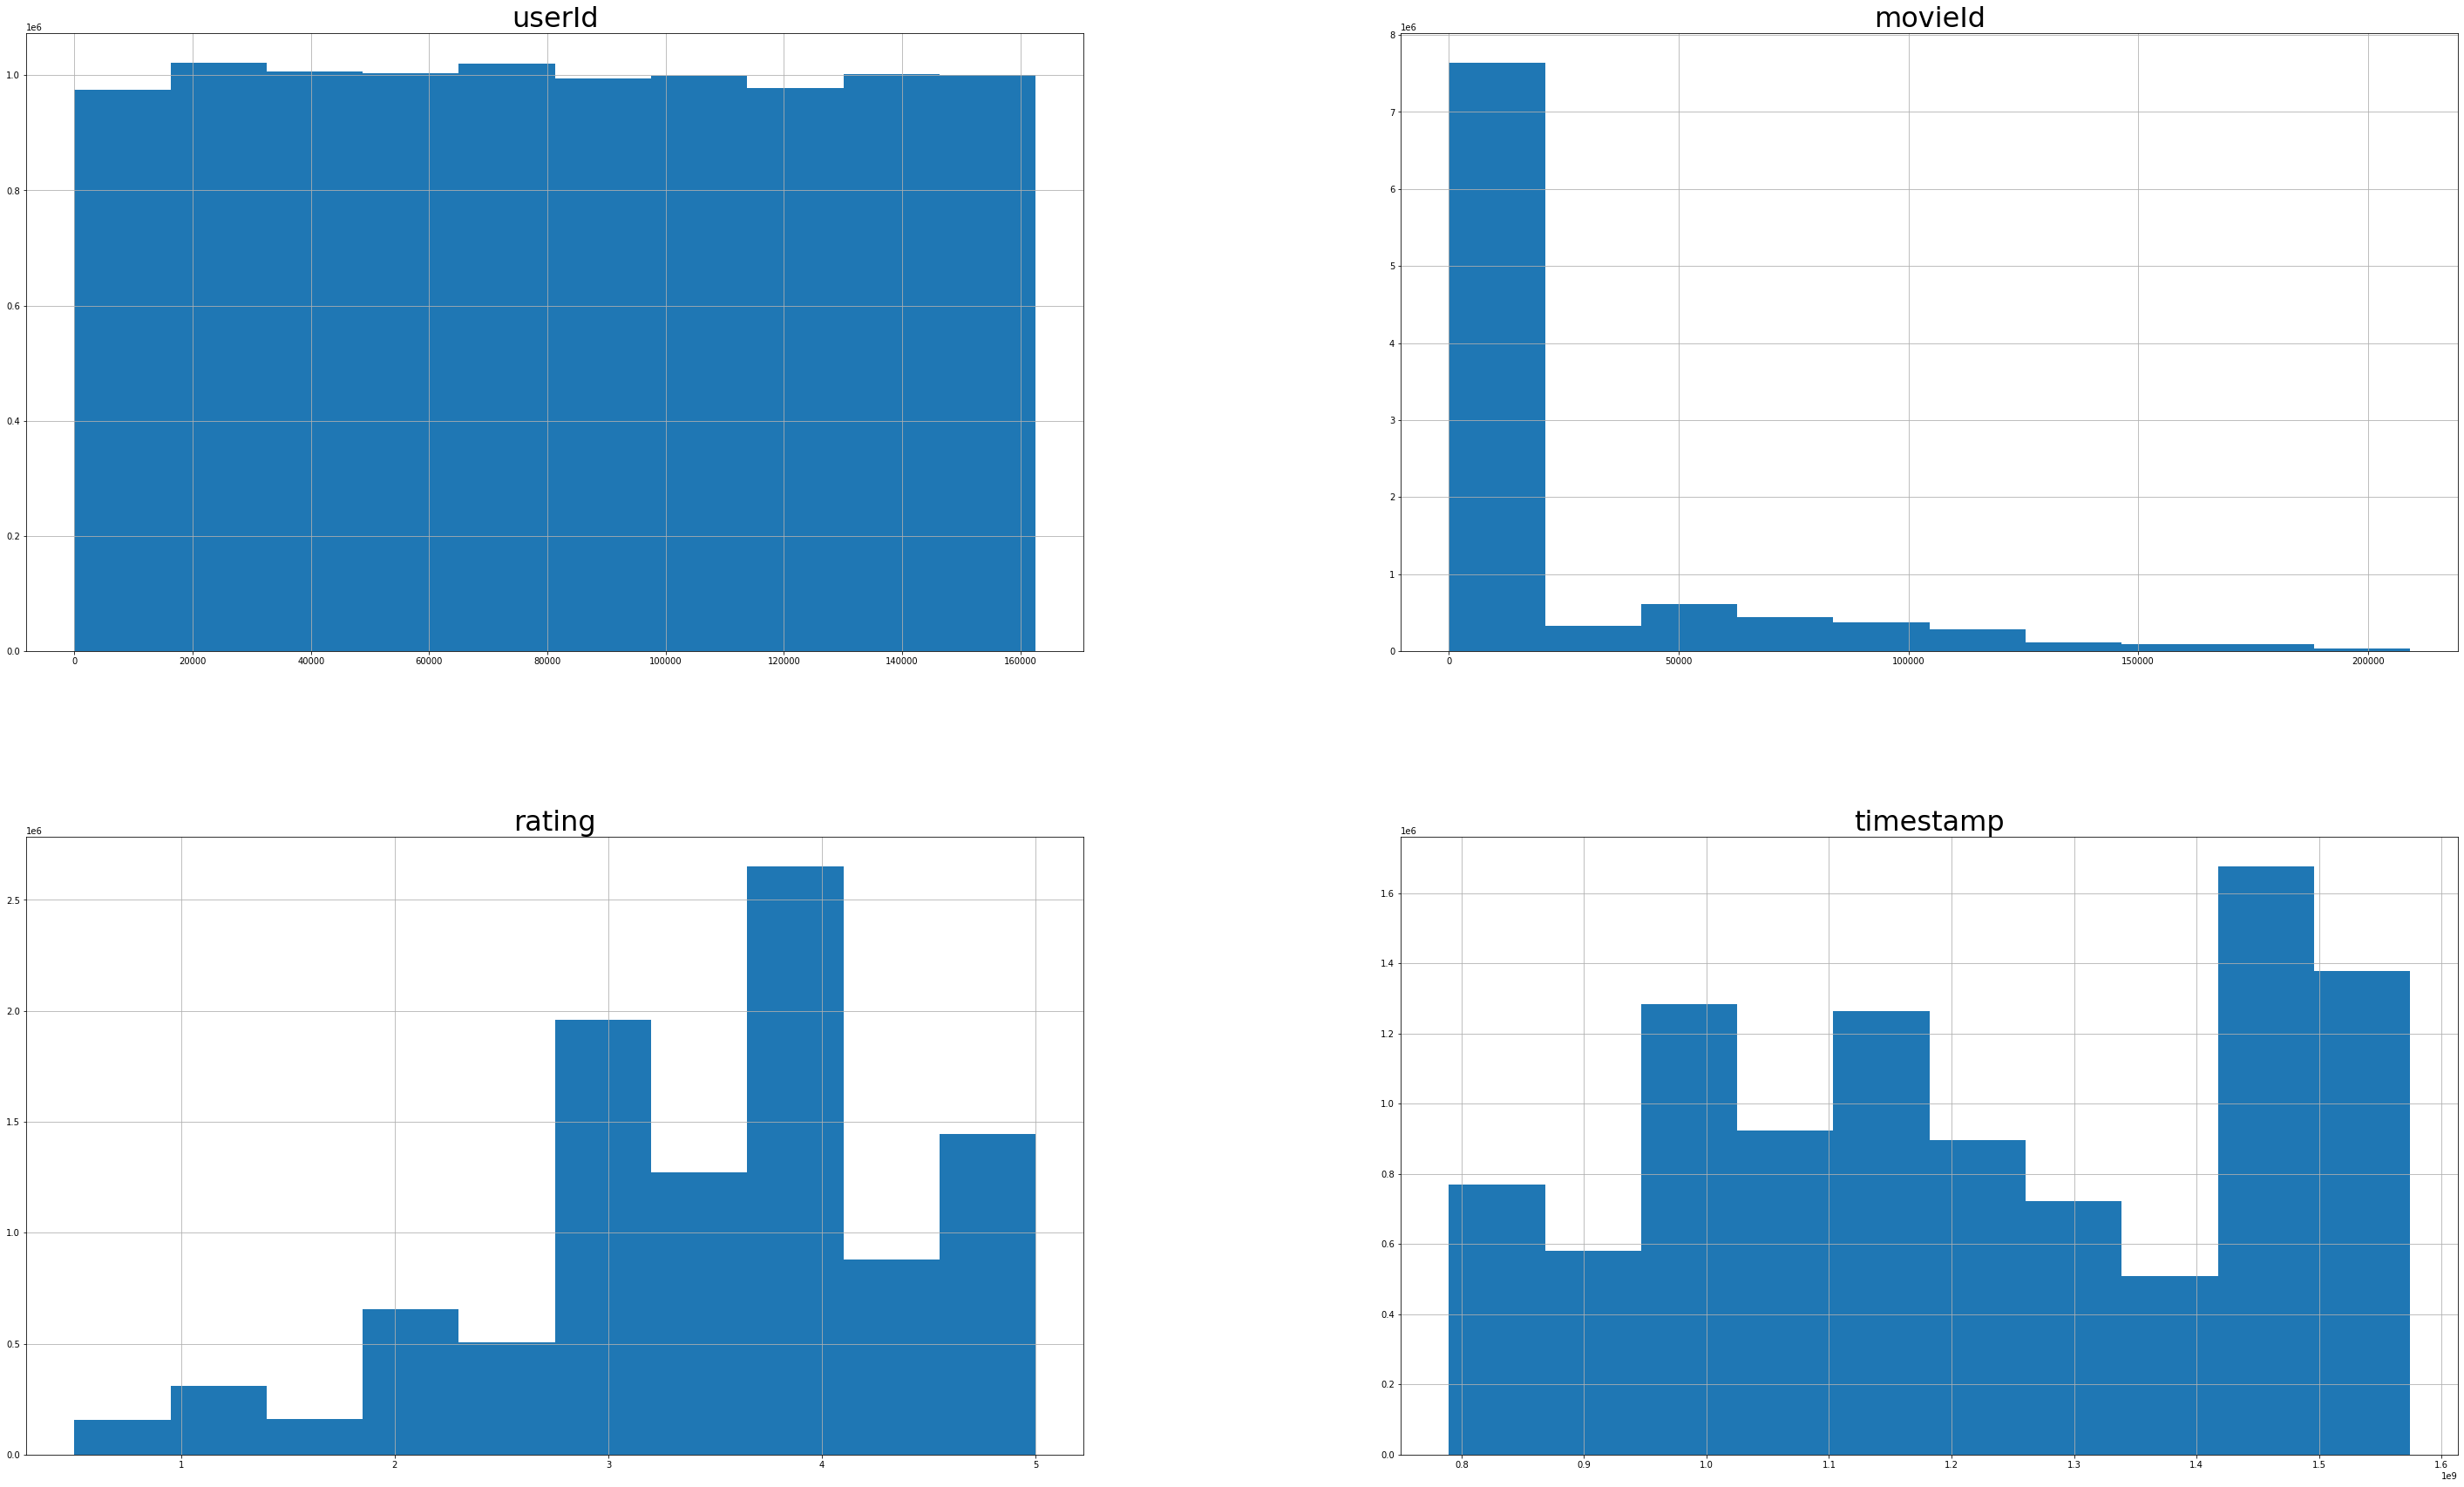

In [15]:
# plot feature distributions
fig = df_train.hist(figsize=(50, 30));
[x.title.set_size(32) for x in fig.ravel()];